# Task 5 : Credit card fraud detection

In [143]:
from IPython.display import display, HTML

display(HTML("""
    <div style="display: flex; justify-content: center;">
        <img src='C:/Users/Nadim/Downloads/WhatsApp Image 2025-01-29 at 11.17.03_513d8839.jpg' width="400">
    </div>
"""))

Author:- Md Nadim

Batch: January-2025

Domain: Data Science

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
df =pd.read_csv("C:/Users/Nadim/Downloads/archive (7)/creditcard.csv")

# Data Analysis

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

# Data Prepocessing

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Data Visualization

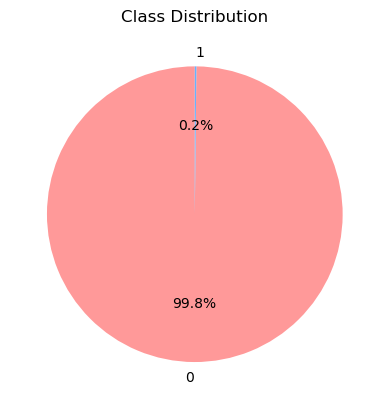

In [141]:
import matplotlib.pyplot as plt

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  

# Plot
class_distribution.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)

plt.title("Class Distribution")
plt.ylabel("")
plt.show()


In [15]:
classes = df['Class'].value_counts()
normal_value = round(classes[0]/df['Class'].count()*100,2)
fraud_values = round(classes[1]/df['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.83
0.17


In [16]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


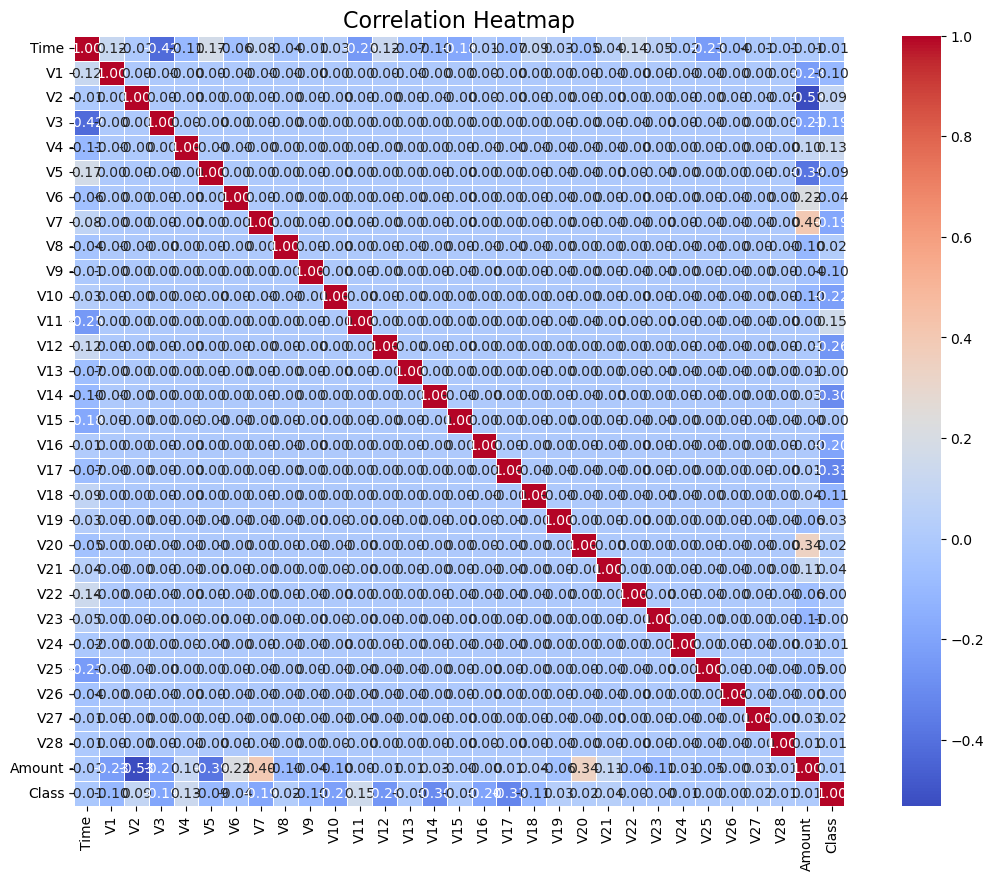

In [17]:
plt.figure(figsize=(15,10))  # Adjusted for better visibility
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [18]:
legit = df[df.Class == 0]

In [19]:
fraud = df[df.Class==1]

In [20]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [23]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
normal_sample = legit.sample(n=492)

In [25]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0)

In [26]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110082,71671.0,1.268621,0.259812,-0.081077,0.450202,0.200435,-0.127591,-0.023475,0.002257,0.123829,...,-0.316971,-0.891545,0.056447,-0.813863,0.246268,0.176838,-0.009659,0.018673,3.59,0
217753,141019.0,-6.864853,4.825720,-4.304191,-3.202416,-0.525355,-1.095937,0.460484,0.499445,2.329687,...,-0.186846,1.125752,-0.287205,0.204402,1.873605,0.261988,0.404759,0.722075,10.00,0
74486,55609.0,1.109681,-0.988403,1.811619,1.176862,-1.893331,0.733934,-1.482011,0.464483,0.753868,...,-0.451773,-0.400834,0.084204,0.354283,0.268766,-0.264415,0.134352,0.042016,25.00,0
83530,59900.0,1.403475,-1.468605,1.318293,-1.257217,-2.436452,-0.508493,-1.801956,0.102294,-0.994387,...,0.073619,0.504040,-0.008469,0.339236,0.141039,-0.038425,0.068050,0.039838,42.00,0
59010,48648.0,1.150053,0.081862,0.786474,2.145250,0.269155,1.933967,-0.779160,0.569873,-0.008826,...,-0.119252,-0.203314,-0.153863,-1.713515,0.417521,0.075768,0.051056,0.005302,6.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [27]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [28]:
new_dataset.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93343.526423,0.017143,0.115117,0.160620,0.013595,-0.055696,-0.005754,0.029031,0.103177,-0.006105,...,0.006099,-0.011398,0.010136,0.006583,-0.011817,-0.032540,0.016436,-0.017290,0.005230,74.027073
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [29]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [30]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
110082,1.268621,0.259812,-0.081077,0.450202,0.200435,-0.127591,-0.023475,0.002257,0.123829,-0.319088,...,-0.891545,0.056447,-0.813863,0.246268,0.176838,-0.009659,0.018673,3.59,0,19
217753,-6.864853,4.825720,-4.304191,-3.202416,-0.525355,-1.095937,0.460484,0.499445,2.329687,7.711833,...,1.125752,-0.287205,0.204402,1.873605,0.261988,0.404759,0.722075,10.00,0,15
74486,1.109681,-0.988403,1.811619,1.176862,-1.893331,0.733934,-1.482011,0.464483,0.753868,0.411081,...,-0.400834,0.084204,0.354283,0.268766,-0.264415,0.134352,0.042016,25.00,0,15
83530,1.403475,-1.468605,1.318293,-1.257217,-2.436452,-0.508493,-1.801956,0.102294,-0.994387,1.423294,...,0.504040,-0.008469,0.339236,0.141039,-0.038425,0.068050,0.039838,42.00,0,16
59010,1.150053,0.081862,0.786474,2.145250,0.269155,1.933967,-0.779160,0.569873,-0.008826,0.623180,...,-0.203314,-0.153863,-1.713515,0.417521,0.075768,0.051056,0.005302,6.08,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


separating the features and target variables

In [32]:
x = new_dataset.drop('Class', axis=1)

In [33]:
y = new_dataset['Class']

In [34]:
x.shape

(984, 30)

In [35]:
y.shape

(984,)

# splitting the data into training and testing data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [38]:
cols = list(x.columns.values)

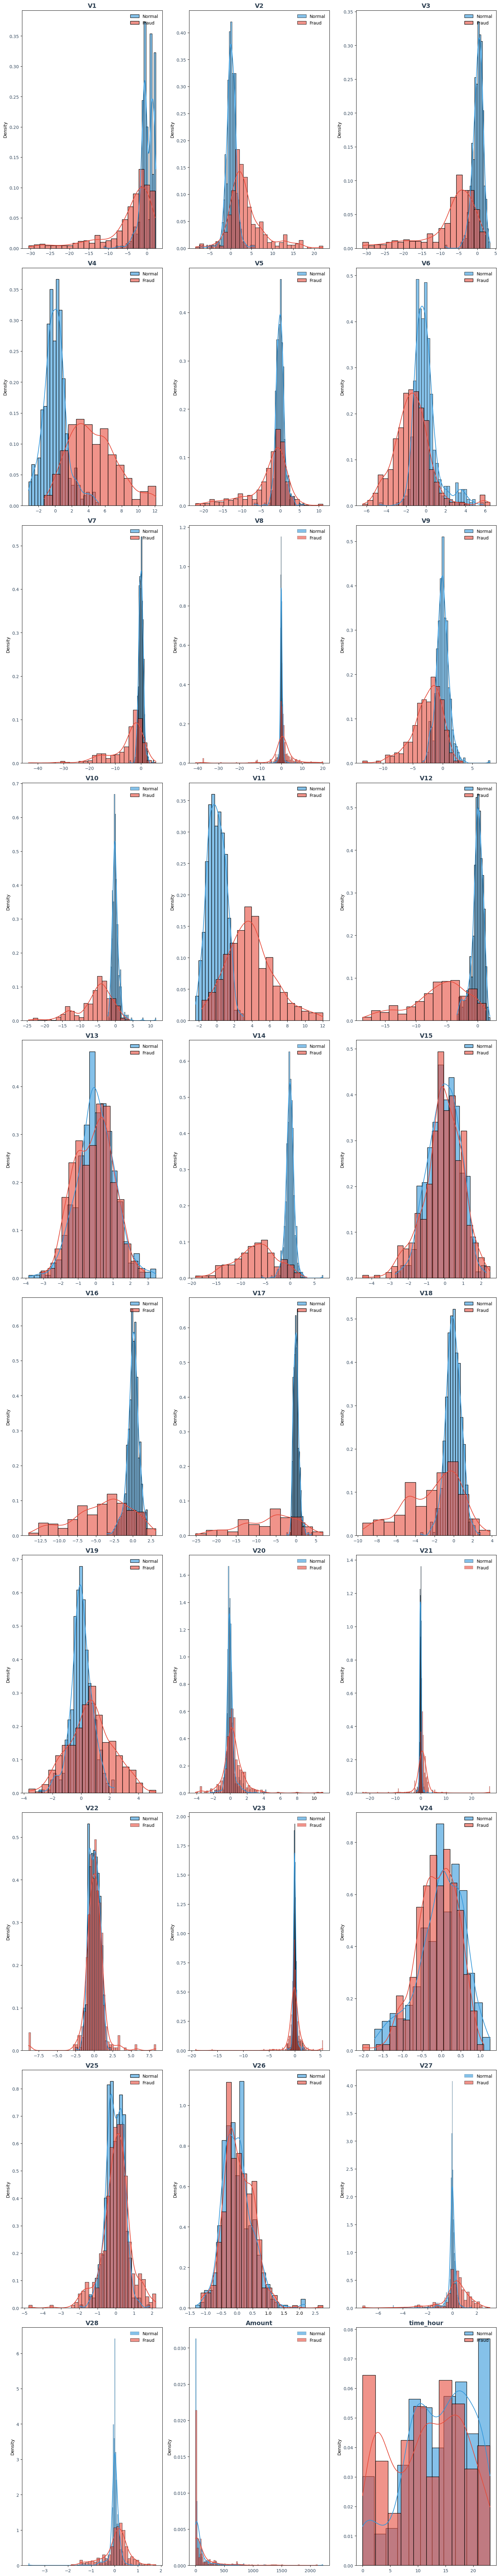

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define normal and fraud entries
normal_entries = new_dataset["Class"] == 0
fraud_entries = new_dataset["Class"] == 1

# Set up the plot
num_cols = len(cols)  # Number of columns to plot
plt.figure(figsize=(16, num_cols * 3))  # Dynamically adjust figure size

# Define new color scheme
normal_color = "#3498db"  # Bright blue
fraud_color = "#e74c3c"   # Vibrant red

# Loop through each column and plot
for n, col in enumerate(cols):
    plt.subplot((num_cols // 3) + 1, 3, n + 1)  # Arrange subplots in a grid
    
    # Plot histograms with transparent colors and stylish KDE
    sns.histplot(new_dataset[col][normal_entries], color=normal_color, kde=True, stat='density', label="Normal", alpha=0.6)
    sns.histplot(new_dataset[col][fraud_entries], color=fraud_color, kde=True, stat='density', label="Fraud", alpha=0.6)

    # Customize titles and layout
    plt.title(col, fontsize=14, fontweight="bold", color="#2c3e50")
    plt.xlabel("")  # Remove redundant x-labels for cleaner look
    plt.xticks(fontsize=10, color="#34495e")  # Adjust font size and color
    plt.yticks(fontsize=10, color="#34495e")
    
    # Remove grid lines for a sleek look
    plt.grid(False)
    
    # Add legend inside the plot for clarity
    plt.legend(loc="upper right", fontsize=10, frameon=False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pred_test = model.predict(x_test)

C:\Users\Nadim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model evaluation

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Set up the figure
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', cbar=False)

    # Labels and title
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("Actual Labels", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

# Example usage:
# plot_confusion_matrix(y_test, y_pred)


In [43]:
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

In [44]:
from sklearn.metrics import accuracy_score

# Correct order: y_test (actual values) vs. y_pred (predicted values)
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f"Accuracy Score: {acc_score}%")


Accuracy Score: 93.9%


In [45]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 93.9


In [46]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [47]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 93.9


In [48]:
from sklearn import metrics

In [49]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 93.9


In [50]:
from sklearn.metrics import classification_report

# Correct order: y_test (actual values) vs. y_pred (predicted values)
class_report = classification_report(y_test, y_pred)

print("📊 Classification Report of Our Model:\n")
print(class_report)


📊 Classification Report of Our Model:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       123
           1       0.97      0.91      0.94       123

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



# we have achieved a model with decent accuracy score

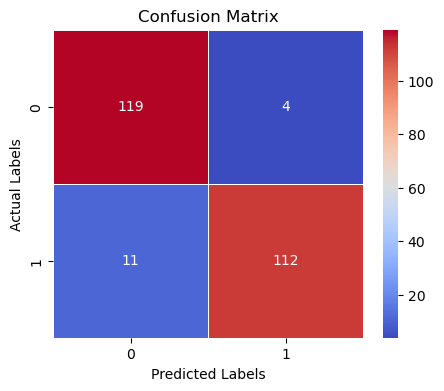

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


In [53]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_score:.2f}")


ROC-AUC Score: 0.94


We have successfully built a model that has achieved a decent accuracy score. This indicates that the model is performing reasonably well in predicting the target variable, correctly classifying a significant portion of the data. However, while accuracy is an important metric, it’s essential to evaluate the model from different angles to get a more comprehensive understanding of its performance.

A decent accuracy score suggests that the model has been able to make correct predictions in a large portion of the cases. Yet, accuracy may not always be the best indicator, especially when dealing with imbalanced datasets where one class is much more frequent than the other (e.g., fraud detection or rare disease prediction). In such cases, the model might achieve high accuracy simply by predicting the majority class most of the time, which could lead to poor performance in detecting the minority class.

To gain more insights into the model’s effectiveness, it’s important to evaluate additional metrics such as:

Precision: How many of the instances predicted as positive were actually positive.
Recall: How many of the actual positive instances were correctly identified.
F1-Score: A balanced measure of precision and recall, providing a more holistic view of model performance.
Additionally, visualizing the model’s predictions using a confusion matrix can help highlight any misclassifications, showing where the model may be making errors. This can be particularly useful in understanding false positives and false negatives, which are crucial in applications like fraud detection.

Furthermore, calculating metrics like the ROC-AUC score can help us assess how well the model distinguishes between the classes. A high ROC-AUC score indicates that the model has a good ability to discriminate between classes, even when the dataset is imbalanced.

Finally, we can explore the feature importance of our model (especially for tree-based models) to understand which features contribute the most to the predictions. This can help in feature selection and give us insights into the underlying patterns the model is learning.

# Thank You